<h1>Importação de pacotes</h1>

In [1]:
# Functions & Arrays
import numpy as np
# DataFrame
import pandas as pd
import statsmodels.tsa.stattools as stat
import statsmodels.stats.diagnostic as dig

from scipy import stats
#from scipy import mean


# GARCH
from arch import arch_model
# Graphics
from matplotlib import pyplot as plt

/Users/bernardopaulsen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<h1>Funções de entrada</h1>

In [2]:
# Funçnao para criar DataFrame por API
def serie(numero, DataInicial, DataFinal):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=csv&&dataInicial={}&dataFinal={}'.format(numero, data_inicial, data_final)
    return(pd.read_csv(url, sep = ';', index_col = 0, decimal = ','))

<h1>Funções de processamento</h1>

In [3]:
# Calcula cupom cambial
def cupomCambial(juros, usd):
    CupomCambialValor = []
    CupomCambialData = []
    for i in range(len(usd.valor)):
        if i >= 1:
            valor = (1+ juros.valor[i]/100)/(usd.valor[i]/usd.valor[i-1])-1
            CupomCambialValor.append(valor)
            CupomCambialData.append(usd.index[i])
    v = {'valor': CupomCambialValor}        
    CupomCambial = pd.DataFrame(v, index = CupomCambialData)
    return(CupomCambial)

In [4]:
# Limite Paramétrico
def limitP(v):
    mais = []
    menos = []
    data = []
    maior = v.mean() + (stats.norm.ppf(q = 0.975) * (v.std()))
    menor = v.mean() - (stats.norm.ppf(q = 0.975) * (v.std()))
    for i in range(len(v.values)):
        mais.append(maior)
        menos.append(menor)
        data.append(v.index[i])
    va = {'UpperLimit': mais, 'LowerLimit': menos}        
    T = pd.DataFrame(va, index = data)
    return(T)

In [5]:
# Limite Não Paramétrico
def limitNP(v):
    mais = []
    menos = []
    valor = []
    data = []
    for i in range(len(v.values)):
        valor.append(v[i])
        array = np.array(valor)
        data.append(v.index[i])
        mais.append(array.mean() + (stats.norm.ppf(q = 0.975) * (array.std())))
        menos.append(array.mean() - (stats.norm.ppf(q = 0.975) * (array.std())))
    va = {'UpperLimit': mais, 'LowerLimit': menos}        
    T = pd.DataFrame(va, index = data)
    return(T)

<h1>Funções de saída</h1>

<h3>Gráfico</h3>

In [6]:
# Função para criar gráfico da variável
def graph(df, seriesName, graphName, pngName, refName, limit = False, np = False):
    if limit == True:
        if np == False:
            limitP(df).plot(figsize = (18,9))
        else:
            limitNP(df).plot(figsize = (18,9))
    df.plot(figsize = (18,9))
    plt.xlabel('Date')
    plt.ylabel(seriesName)
    plt.grid(which = 'both', axis = 'x')
    plt.savefig(pngName)
    plt.show()
    
    a = open('{}.txt'.format(pngName), 'w')
    a.write('''\\begin{{figure}}[H]
\\caption{{{}}}
\\label{{{}}}
\\centering
\\includegraphics[width=\\textwidth]{{images/{}.png}}
\\end{{figure}}'''.format(graphName, refName, pngName))
    a.close()   

<h3>Estatísticas descritivas e testes</h3>

In [7]:
# Função para criar tabela de estatisticas decritivas
def des(refName, variables = [], names = [], csd = False):
    b = open('{}.txt'.format(refName), 'w')
    a = '''\\begin{{table}}[H]
\\caption{{Descriptive Statistics}}
\\label{{{}}}
\\centering
\\begin{{tabular}}{{ | c | c | c | c | c | }}
\\hline
Series & Mean & Standard Deviation & Minimum Value & Maximum Value \\\\
\\hline \\hline'''.format(refName)
    if csd == False:
        for i in range(len(variables)):
            var = variables[i]
            a += '\n{0} & {1:.3f} & {2:.3f} & {3:.3f} & {4:.3f} \\\\'.format(names[i],
                                                                             var.mean()[0],
                                                                             var.std()[0],
                                                                             var.min()[0],
                                                                             var.max()[0])
            a += '\n\\hline'
    else:
        for i in range(len(variables)):
            var = variables[i]
            a += '\n{0} & {1:.3f} & {2:.3f} & {3:.3f} & {4:.3f} \\\\'.format(names[i],
                                                                             var.mean(),
                                                                             var.std(),
                                                                             var.min(),
                                                                             var.max())
            a += '\n\\hline'
    a += '''\n\\end{tabular}
\\end{table}'''
    b.write(a)
    b.close()

In [8]:
# Teste de Augmented Dickey-Fuller
def adf(refName, variables = [], names = []):
    b = open('{}.txt'.format(refName), 'w')
    a = '''\\begin{{table}}[H]
\\caption{{Augmented Dickey-Fuller Test}}
\\label{{{}}}
\\centering
\\begin{{tabular}}{{ | c | c | c | }}
\\hline
Series & Test Statistic & Critical Value at 5\% Level \\\\
\\hline \\hline'''.format(refName)
    for i in range(len(variables)):
        adf = stat.adfuller(variables[i].valor)
        a += '\n{0} & {1:.3e} & {2:.3e} \\\\'.format(names[i],
                                                     adf[0],
                                                     adf[4]['5%'])
        a += '\n\\hline'
    a += '''\n\\end{tabular}
\\end{table}'''
    b.write(a)
    b.close()

In [9]:
# Teste de KPSS
def kpss(refName, variables = [], names = []):
    b = open('{}.txt'.format(refName), 'w')
    a = '''\\begin{{table}}[H]
\\caption{{Augmented Dickey-Fuller Test}}
\\label{{{}}}
\\centering
\\begin{{tabular}}{{ | c | c | c | }}
\\hline
Series & Test Statistic & Critical Value at 5\% Level \\\\
\\hline \\hline'''.format(refName)
    for i in range(len(variables)):
        kpss = stat.kpss(variables[i].valor)
        a += '\n{0} & {1:.3e} & {2:.3e} \\\\'.format(names[i],
                                                     kpss[0],
                                                     kpss[3]['5%'])
        a += '\n\\hline'
    a += '''\n\\end{tabular}
\\end{table}'''
    b.write(a)
    b.close()

In [10]:
# Testes de Ljung-Box e Shapiro-Wilk
def ljungShapiro(refName, variables = [], names = []):
    b = open('{}.txt'.format(refName), 'w')
    a = '''\\begin{{table}}[H]
\\caption{{Ljung-Box Test and Shapiro-Wilk Test}}
\\label{{{}}}
\\centering
\\begin{{tabular}}{{ | c | c | c | }}
\\hline
Series & P-value for Ljung-Box Test & P-value for Shapiro-Wilk Test \\\\
\\hline \\hline'''.format(refName)
    for i in range(len(variables)):
        var = variables[i]
        a += '\n{0} & {1:.3e} & {2:.3e} \\\\'.format(names[i],
                                                     dig.acorr_ljungbox(var, lags=1)[1][0],
                                                     stats.shapiro(var)[1])
        a += '\n\\hline'
    a += '''\n\\end{tabular}
\\end{table}'''
    b.write(a)
    b.close()

In [11]:
# Testes de Ljung-Box e Shapiro-Wilk
def shapiro(refName, variables = [], names = []):
    b = open('{}.txt'.format(refName), 'w')
    a = '''\\begin{{table}}[H]
\\caption{{Shapiro-Wilk Test}}
\\label{{{}}}
\\centering
\\begin{{tabular}}{{ | c | c | }}
\\hline
Series & P-value \\\\
\\hline \\hline'''.format(refName)
    for i in range(len(variables)):
        var = variables[i]
        a += '\n{0} & {1:.3e} \\\\'.format(names[i],
                                           dig.acorr_ljungbox(var, lags=1)[1][0])
        a += '\n\\hline'
    a += '''\n\\end{tabular}
\\end{table}'''
    b.write(a)
    b.close()

In [12]:
# Tabela com limites da análise paramétrica
def tabP(refName, variables = [], names = []):
    b = open('{}.txt'.format(refName), 'w')
    a = '''\\begin{{table}}[H]
\\caption{{Limits from Parametric Analysis}}
\\label{{{}}}
\\centering
\\begin{{tabular}}{{ | c | c | c | c | c | }}
\\hline
Series & Lower Limit & Upper Limit \\\\
\\hline \\hline'''.format(refName)
    for i in range(len(variables)):
        var = variables[i]
        a += '\n{0} & {1:.3f} & {2:.3f} \\\\'.format(names[i],
                                                     var.LowerLimit[0],
                                                     var.UpperLimit[0])
        a += '\n\\hline'
    a += '''\n\\end{tabular}
\\end{table}'''
    b.write(a)
    b.close()

In [13]:
# Tabela com média dos limites da análise nãp paramétrica
def tabNP(refName, variables = [], names = []):
    b = open('{}.txt'.format(refName), 'w')
    a = '''\\begin{{table}}[H]
\\caption{{Limits from Parametric Analysis}}
\\label{{{}}}
\\centering
\\begin{{tabular}}{{ | c | c | c | c | c | }}
\\hline
Series & Mean of Lower Limits & Mean of Upper Limits \\\\
\\hline \\hline'''.format(refName)
    for i in range(len(variables)):
        var = variables[i]
        a += '\n{0} & {1:.3f} & {2:.3f} \\\\'.format(names[i],
                                                     var.LowerLimit.mean(),
                                                     var.UpperLimit.mean())
        a += '\n\\hline'
    a += '''\n\\end{tabular}
\\end{table}'''
    b.write(a)
    b.close()

In [ ]:
def outside(refName, ec, csd, lim):
    b = open('{}.txt'.format(refName), 'w')
    a = '''\\begin{{table}}[H]
\\caption{{Days with Abnormal Returns}}
\\label{{{}}}
\\centering
\\begin{{tabular}}{{ | c | c | c | c | c | c |}}
\\hline
& Exchange Coupon & Conditional Standard Deviation & Lower Limit & Upper Limit & Date \\\\
\\hline \\hline'''.format(refName)
    n = 0
    for i in range(len(csd.index)):
        if csd[i] > lim.UpperLimit[i]:
            n += 1
            a += '\n{0} & {1:.3f} & {2:.3f} & {3:.3f} & {4:.3f} & {5}\\\\'.format(n,
                                                                                  ec.valor[i],
                                                                                  csd[i],
                                                                                  lim.LowerLimit[i],
                                                                                  lim.UpperLimit[i],
                                                                                  csd.index[i])
            a += '\n\\hline'
        elif csd[i] < lim.LowerLimit[i]:
            n += 1
            a += '\n{0} & {1:.3f} & {2:.3f} & {3:.3f} & {4:.3f} & {5}\\\\'.format(n,
                                                                                  ec.valor[i],
                                                                                  csd[i],
                                                                                  lim.LowerLimit[i],
                                                                                  lim.UpperLimit[i],
                                                                                  csd.index[i])
            a += '\n\\hline'
    a += '''\n\\end{tabular}
\\end{table}'''
    b.write(a)
    b.close()

<h1>Entrada de dados</h1>

In [14]:
# Datas de início e fim para as séries que serão coletadas
data_inicial = '06/07/2015'
data_final = '30/04/2019'

<h1>Processamento de dados</h1>

In [15]:
# Criação dos DataFrames das variáveis
PTAX = serie(1, data_inicial, data_final)
Selic = serie(11, data_inicial, data_final)
DI = serie(12, data_inicial, data_final)

In [16]:
# Cálculo do cupom cambial
CupomCambialOC = cupomCambial(Selic, PTAX)
CupomCambialDI = cupomCambial(DI, PTAX)

In [17]:
# Estimação do GARCH
ResultadoGarchOC = arch_model(CupomCambialOC.valor).fit()
ResultadoGarchDI = arch_model(CupomCambialDI.valor).fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -3116.0036600561207
Iteration:      2,   Func. Count:     19,   Neg. LLF: -3116.111884501012
Iteration:      3,   Func. Count:     32,   Neg. LLF: -3116.1189609548937
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3116.118961806979
            Iterations: 3
            Function evaluations: 43
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: -3116.00494190027
Iteration:      2,   Func. Count:     19,   Neg. LLF: -3116.1131856788743
Iteration:      3,   Func. Count:     32,   Neg. LLF: -3116.1198691215504
Iteration:      4,   Func. Count:     45,   Neg. LLF: -3116.1202275100404
Iteration:      5,   Func. Count:     60,   Neg. LLF: -3116.120255085779
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3116.120255392013
            Iterations: 7
            Function evaluations: 71
            Gradient evaluatio

In [18]:
# Definição dos limites
# Análise Paramétrica
OCP = limitP(ResultadoGarchOC.conditional_volatility)
DIP = limitP(ResultadoGarchDI.conditional_volatility)
# Análise Não Paramétrica
OCnP = limitNP(ResultadoGarchOC.conditional_volatility)
DInP = limitNP(ResultadoGarchDI.conditional_volatility)

<h1>Saída de dados</h1>

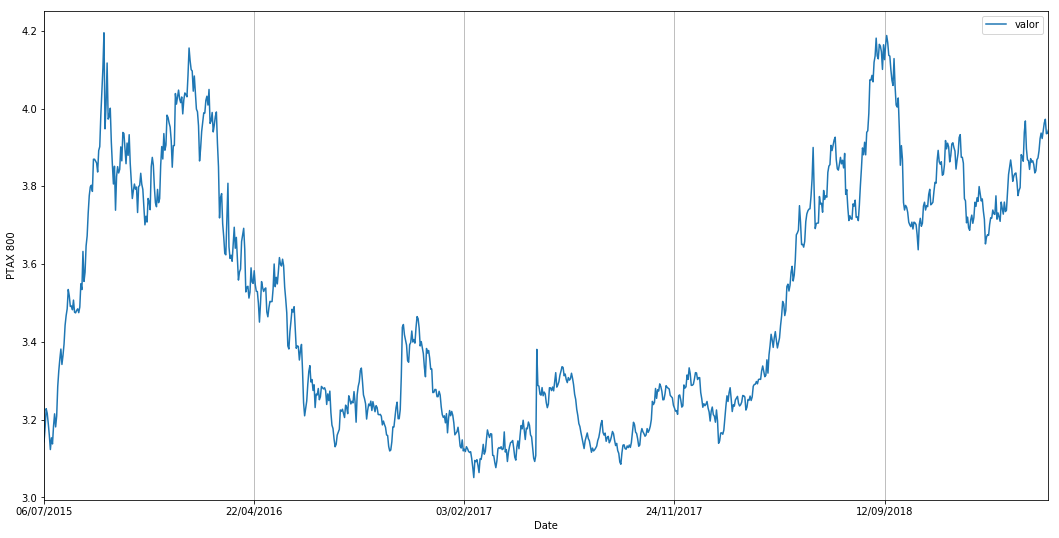

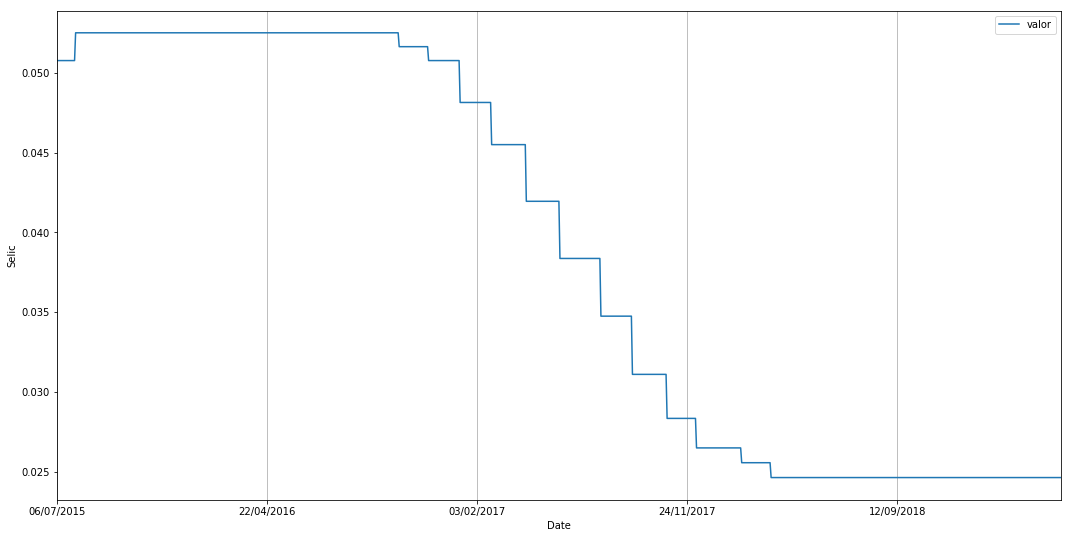

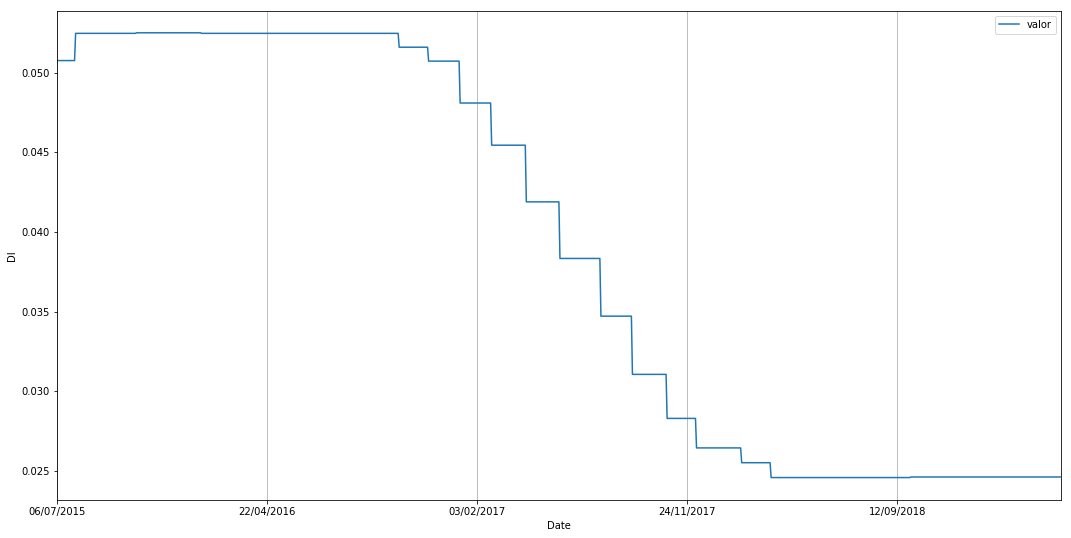

In [19]:
# Gráficos e estatísticas descritivas das séries base
graph(PTAX,
      'PTAX 800',
      'Dollar Exchange Rate',
      'PTAX',
      'fig:PTAX')
graph(Selic,
      'Selic',
      'Referential Rate of the Special Settlement and Custody System',
      'Selic',
      'fig:Selic')
graph(DI,
      'DI',
      'Interbank Deposit Rate',
      'DI',
      'fig:DI')
des('tab:desptaxselicdi',
    [PTAX, Selic, DI],
    ['PTAX', 'Selic', 'DI'])

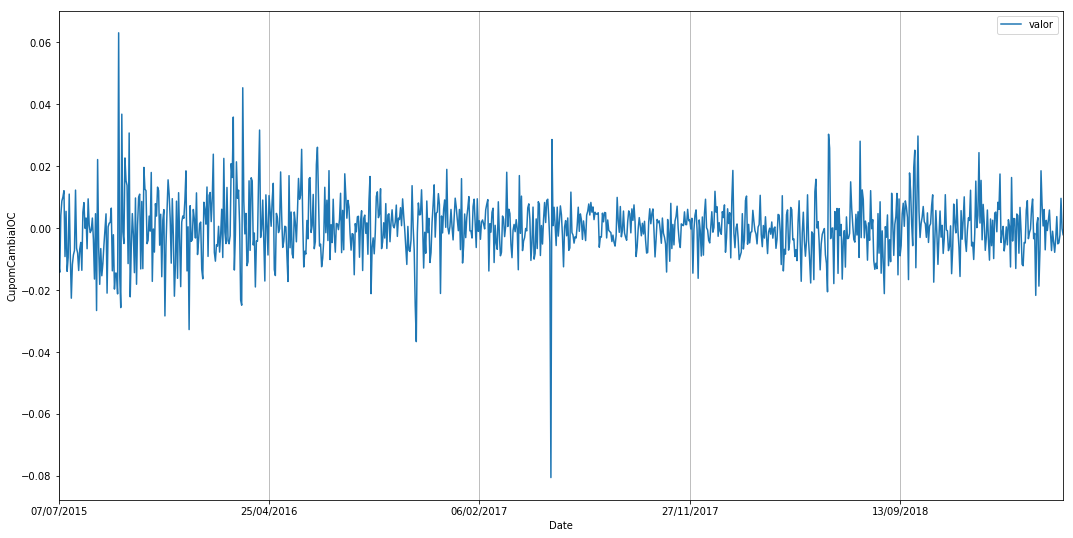

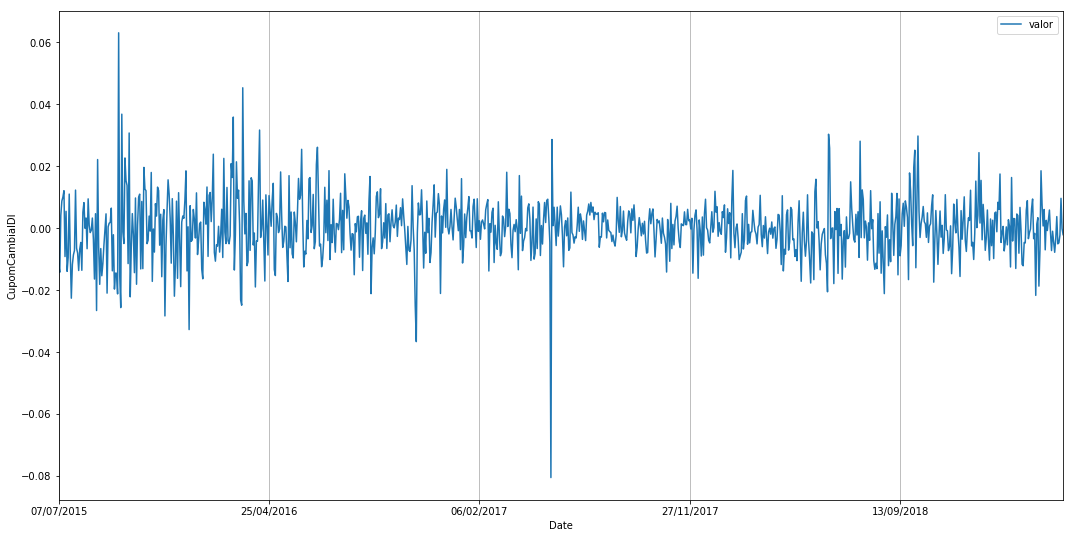

/Users/bernardopaulsen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [20]:
# Gráficos e estatísticas descritivas (com testes) das séries de cupom cambial
graph(CupomCambialOC,
      'CupomCambialOC',
      'OC1 Exchange Coupon',
      'OC1',
      'fig:oc1')
graph(CupomCambialDI,
      'CupomCambialDI',
      'DI1 Exchange Coupon',
      'DI1',
      'fig:di1')
des('tab:desc_oc1_di1',
    [CupomCambialOC, CupomCambialDI],
    ['OC1 Exchange Coupon', 'DI1 Exchange Coupon'])
adf('tab:coupon_adf',
    [CupomCambialOC, CupomCambialDI],
    ['OC1 Exchange Coupon', 'DI1 Exchange Coupon'])
kpss('tab:coupon_kpss',
    [CupomCambialOC, CupomCambialDI],
    ['OC1 Exchange Coupon', 'DI1 Exchange Coupon'])

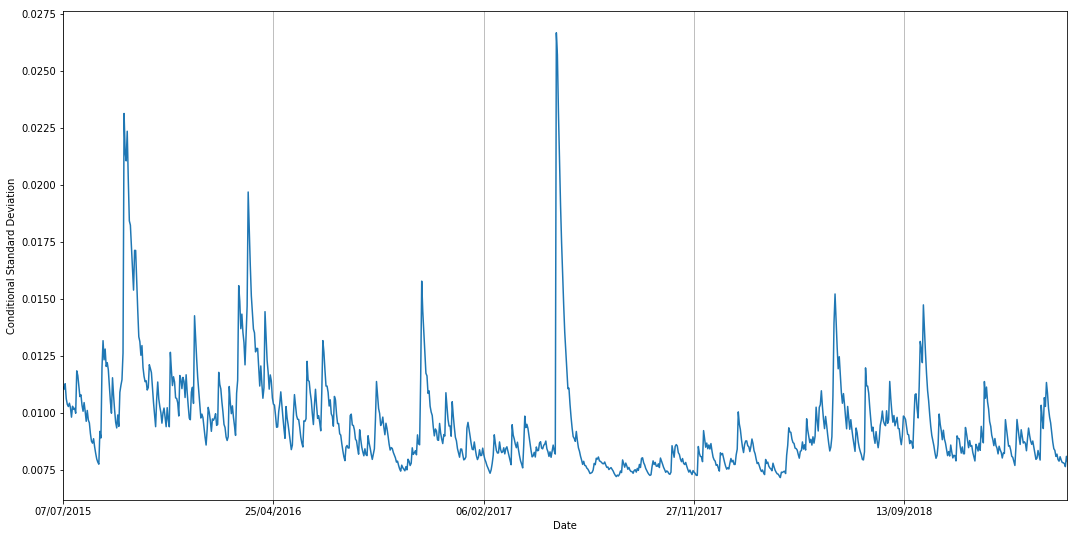

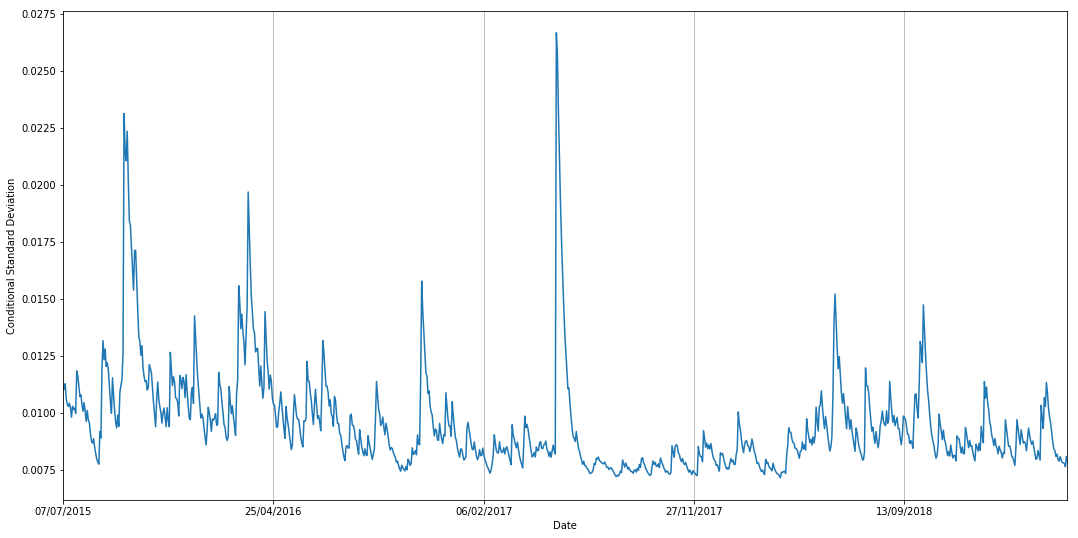

In [21]:
# Tabelas e gráficos do GARCH
ljungShapiro('tab:residuals_white',
             [ResultadoGarchOC.resid, ResultadoGarchDI.resid],
             ['Residuals of OC1 Exchange Coupon', 'Residuals of DI1 Exchange Coupon'])
graph(ResultadoGarchOC.conditional_volatility,
      'Conditional Standard Deviation',
      'Conditional Standard Deviation of OC1 Exchange Coupon',
      'CSDOC',
      'fig:csdoc')
graph(ResultadoGarchDI.conditional_volatility,
      'Conditional Standard Deviation',
      'Conditional Standard Deviation of OC1 Exchange Coupon',
      'CSDDI',
      'fig:csddi')
des('tab:des_csd',
    [ResultadoGarchOC.conditional_volatility, ResultadoGarchDI.conditional_volatility],
    ['CSD of OC1 Exchange Coupon', 'CSD of Exchange Coupon'],
    csd = True)

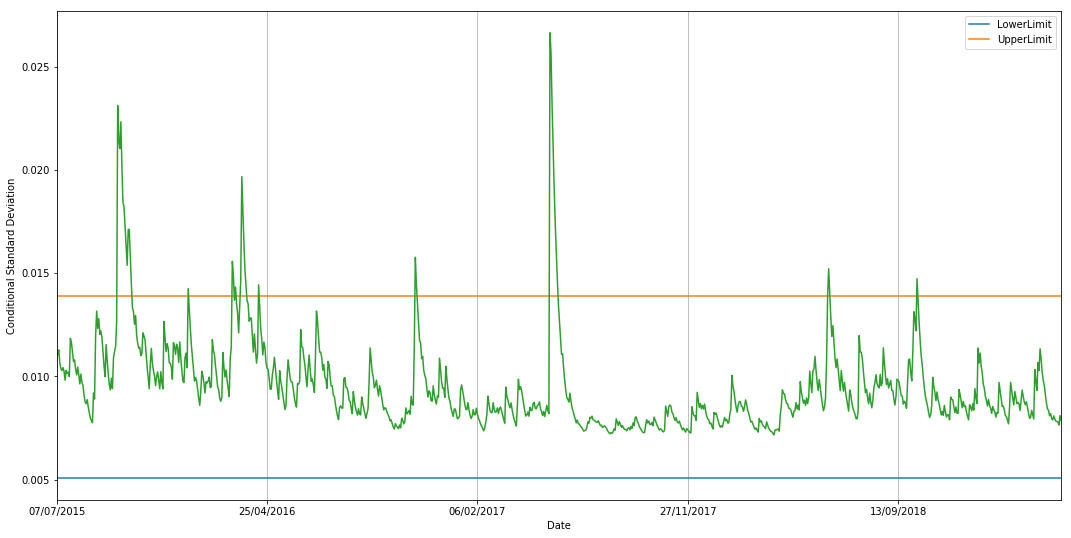

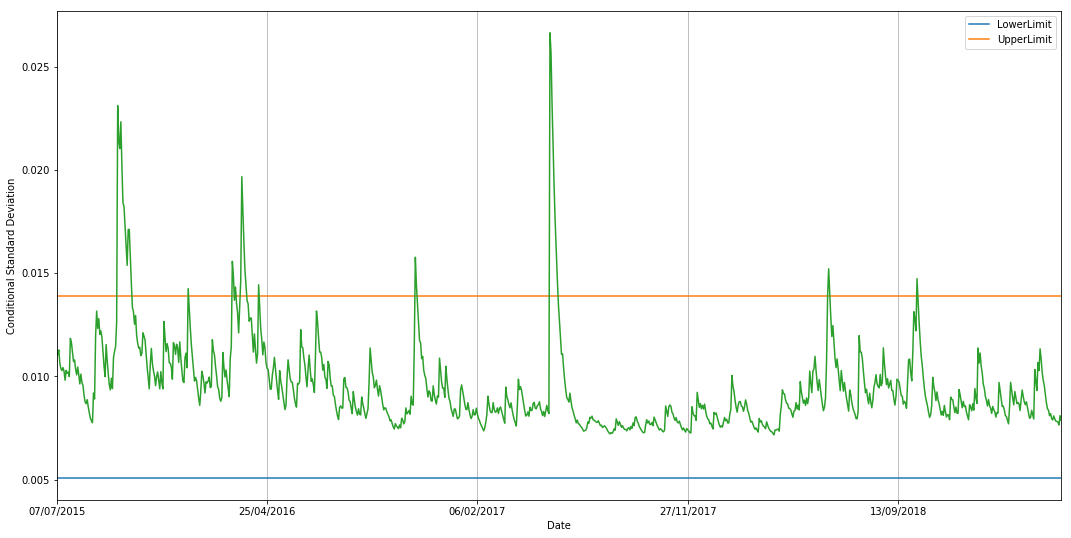

In [22]:
# Gráfico e tabela análise paramétrica
shapiro('tab:shapiro',
        [ResultadoGarchOC.conditional_volatility, ResultadoGarchDI.conditional_volatility],
        ['Conditional Standard Deviation of OC1 Exchange Coupon', 'Conditional Standard Deviation of DI1 Exchange Coupon'])
tabP('tab:par_lim',
     [OCP, DIP],
     ['CSD of OC1 Exchange Coupon', 'CSD of Exchange Coupon'])
graph(ResultadoGarchOC.conditional_volatility,
      'Conditional Standard Deviation',
      'Parametric Limits for Conditional Standard Deviation of OC1 Exchange Couponn',
      'par_oc',
      'fig:par_oc',
      limit = True)
graph(ResultadoGarchDI.conditional_volatility,
      'Conditional Standard Deviation',
      'Parametric Limits for Conditional Standard Deviation of DI1 Exchange Couponn',
      'par_di',
      'fig:par_di',
      limit = True)
outside('tab:limite_par_oc',
        CupomCambialOC,
        ResultadoGarchOC.conditional_volatility,
        DIP)
outside('tab:limite_par_di',
        CupomCambialDI,
        ResultadoGarchDI.conditional_volatility,
        DIP)

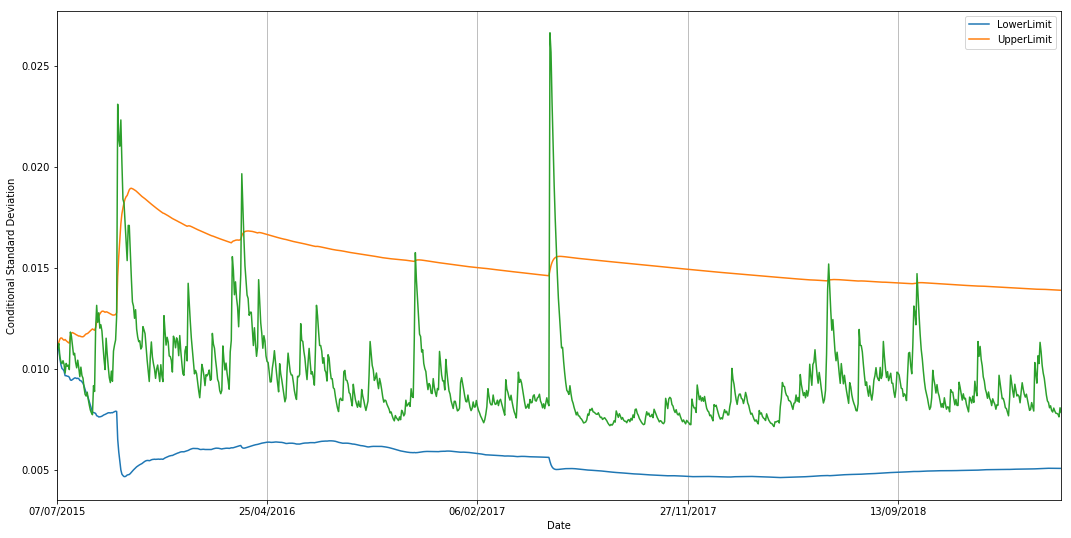

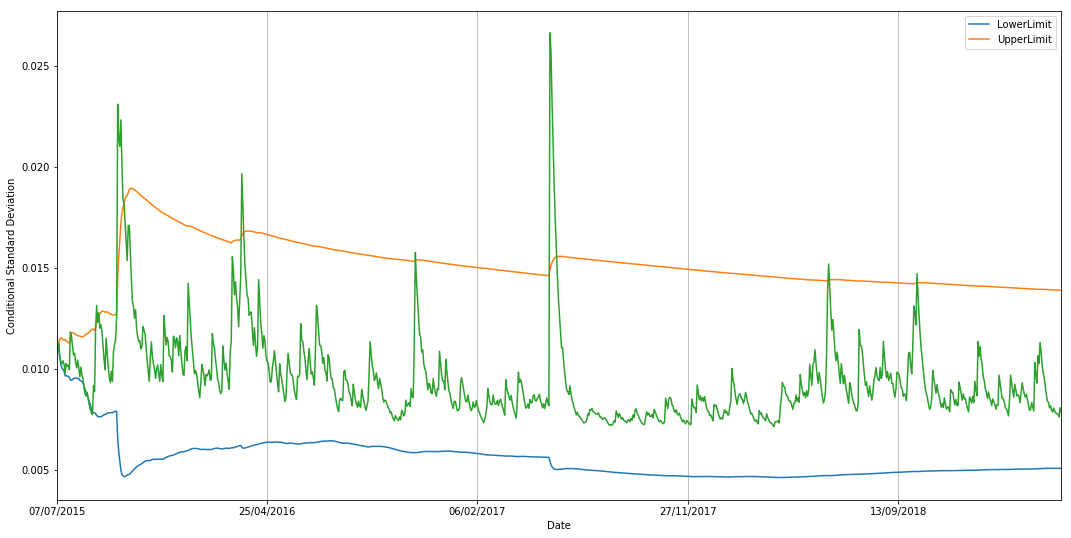

In [23]:
# Gráfico e tabela análise não paramétrica
tabNP('tab:non_lim',
     [OCnP, DInP],
     ['CSD of OC1 Exchange Coupon', 'CSD of Exchange Coupon'])
graph(ResultadoGarchOC.conditional_volatility,
      'Conditional Standard Deviation',
      'Non-Parametric Limits for Conditional Standard Deviation of OC1 Exchange Couponn',
      'non_oc',
      'fig:non_oc',
      limit = True,
      np = True)
graph(ResultadoGarchDI.conditional_volatility,
      'Conditional Standard Deviation',
      'Non-Parametric Limits for Conditional Standard Deviation of DI1 Exchange Couponn',
      'non_di',
      'fig:non_di',
      limit = True,
      np = True)
outside('tab:limite_non_oc',
        CupomCambialOC,
        ResultadoGarchOC.conditional_volatility,
        DInP)
outside('tab:limite_non_di',
        CupomCambialDI,
        ResultadoGarchDI.conditional_volatility,
        DInP)

In [77]:
def separar_dias(csd, lim):
    datas = []
    for i in range(len(csd)):
        if csd[i] > lim.UpperLimit[i]:
            datas.append(lim.index[i])
        if csd[i] < lim.LowerLimit[i]:
            datas.append(lim.index[i])
    return(datas)

In [78]:
ipa = separar_dias(ResultadoGarchOC.conditional_volatility, OCP)

In [86]:
def achar_noticias(arquivo, palavras):
    lista = []
    for linha in arquivo.readlines():
        achou = False
        for palavra in palavras:
            if achou == False:
                if (palavra.lower() in linha.lower()[:linha.find('link')]) == True:
                    lista.append(linha)
                    achou == True
    return(lista)

def separar_data(lista):
    datas = []
    for linha in lista:
        datas.append(linha[10:20])
    return(datas)

def juntar_mesmas(lista):
    dias = []
    ultima = ''
    for data in lista:
        if data != ultima:
            dias.append(data)
            ultima = data
    return(dias)


In [87]:
a = open("noticias.json")

opa = achar_noticias(a, [incerteza', 'volatilidade', 'mercado', 'economia', 'd\\u00f3lar', 'selic', 'cdi'])

a.close()

In [88]:
def vamos(dias, noticias):
    a = ''
    for dia in dias:
        for noticia in noticias:
            if (dia in noticia[10:20]):
                a += '\n{} - {}'.format(dia, noticia[noticia.find('titulo')+10:noticia.find('link')-6])
    print(a)

In [89]:
vamos(ipa, opa)


08/10/2015 - An\u00e1lise: Impeachment vai ser bom ou ruim para o mercado?
13/10/2015 - Agenda de Renan para reaquecer economia n\u00e3o avan\u00e7a no Congresso
17/03/2016 - Loja fecha para empregados irem a protesto que tem economia entre temas
18/03/2016 - D\u00f3lar caro? \"N\u00f3s compramos na 25 de mar\u00e7o\", diz Lula
18/03/2016 - D\u00f3lar caro? \"N\u00f3s compramos na 25 de mar\u00e7o\", diz Lula
16/11/2016 - Agrimericado: an\u00e1lise do mercado cambial com Wolfgang Walter
24/05/2017 - Cotado para substituir Temer, Jobim transita entre Judici\u00e1rio, governo e mercado
12/06/2018 - Pesquisa que indica indiferen\u00e7a da maioria \u00e0 Copa do Mundo \u00e9 mais relevante para mostrar o mal-estar do que n\u00fameros sobre a economia
13/06/2018 - Saque do PIS/Pasep pode injetar R$ 39 bi na economia
09/10/2018 - Haddad \u00e9 o candidato do povo, e mercado vai se curvar, diz Jaques Wagner


In [72]:
a = open("noticias.json")

opa = achar_noticias(a, ['incerteza', 'mercado', 'economia', 'd\\u00f3lar', 'selic', 'cdi'])

a.close()

In [67]:
opa[10][opa[10].find('titulo')+10:opa[10].find('link')-6]

'Tigr\\u00e3o e tchutchuca foram falta de decoro parlamentar? Para juristas, n\\u00e3o'

In [28]:
'''
def maior(resultado, l, nome):
    datas = []
    dia = []
    se = []
    n = 0
    s = '---Dates with Abnormal Volatility for {}---'.format(nome)
    for i in range(len(l.index)):
        dia.append(l.index[i])
        if resultado[i] > l.UpperLimit[i]:
            datas.append(l.index[i])
            n += 1
            se.append(1)
        elif resultado[i] < l.LowerLimit[i]:
            n += 1
            datas.append(l.index[i])
            se.append(1)
        else:
            se.append(0)
    for i in range(len(datas)):
        s += '\nDay number {}: {}'.format((i+1), datas[i])
    s += '\nDays with abnarmal volatility: {}'.format(n)
    
    va = {'VolatilidadeAnormal': se}        
    T = pd.DataFrame(va, index = dia)
    return(T)

maior(ResultadoGarchOC.conditional_volatility, OCP, 'OC').plot(figsize = (18,9))
maior(ResultadoGarchOC.conditional_volatility, OCnP, 'OC').plot(figsize = (18,9))
plt.show()
'''